In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [3]:
# Carga desde un archivo .xlsx sin indice
Milan  = pd.read_csv('../ValoresAtipicosMilan.csv')

In [4]:
# Verificamos información del dataframe
Milan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23705 entries, 0 to 23704
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            23705 non-null  int64  
 1   last_scraped                                  23705 non-null  object 
 2   name                                          23705 non-null  object 
 3   host_id                                       23705 non-null  int64  
 4   host_name                                     23705 non-null  object 
 5   host_since                                    23705 non-null  object 
 6   host_response_time                            23705 non-null  object 
 7   host_is_superhost                             23705 non-null  object 
 8   host_identity_verified                        23705 non-null  object 
 9   neighbourhood                                 23705 non-null 

DETERMINACIÓN DE CLASES PARA DATOS AGRUPADOS 

In [5]:
#Calculamos el numero total de la población "n"

Milan['price'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 23705 entries, 0 to 23704
Series name: price
Non-Null Count  Dtype  
--------------  -----  
23705 non-null  float64
dtypes: float64(1)
memory usage: 185.3 KB


In [6]:
# Obtenemos el limite superior y el límite inferios de la columna objetivo
Max = Milan['price'].max()
Min = Milan['price'].min()
Limites = [Min, Max]
Limites

[14.0, 3000.0]

In [9]:
# Calculamos el rango R
R = Max - Min
R

2986.0

In [10]:
# Calculamos el número de intervalos de clase "ni", aplicando la regla de Sturges
n = 23706

ni = 1 + 3.32 * np.log10(n)
ni

15.524529489816098

In [11]:
# Calculamos el ancho del intervalo "i"
i = R / ni
i

192.34077283686952

CREACIÓN DE CATEGORÍAS A PARTIR DE CLASES

In [14]:
# Categorización de variables
intervalos = np.linspace (14, 3000, 16)
intervalos

array([  14.        ,  213.06666667,  412.13333333,  611.2       ,
        810.26666667, 1009.33333333, 1208.4       , 1407.46666667,
       1606.53333333, 1805.6       , 2004.66666667, 2203.73333333,
       2402.8       , 2601.86666667, 2800.93333333, 3000.        ])

In [15]:
# Creamos las categorías
categorias = [
    "Económico",
    "Poco económico",
    "Bajo presupuesto",
    "Moderado bajo",
    "Moderado",
    "Precio estándar",
    "Accesible",
    "Precio razonable",
    "Caro",
    "Muy caro",
    "De lujo",
    "Exclusivo",
    "De alta gama",
    "Premium",
    "De lujo extremo"
]


In [16]:
# Creamos las ctegorias en la columna numerica
Milan['price'] = pd.cut ( x = Milan['price'], bins = intervalos, labels = categorias )
Milan['price']

0             Económico
1             Económico
2             Económico
3             Económico
4             Económico
              ...      
23700         Económico
23701    Poco económico
23702    Poco económico
23703    Poco económico
23704    Poco económico
Name: price, Length: 23705, dtype: category
Categories (15, object): ['Económico' < 'Poco económico' < 'Bajo presupuesto' < 'Moderado bajo' ... 'Exclusivo' < 'De alta gama' < 'Premium' < 'De lujo extremo']

In [17]:
table1 = freq_tbl(Milan['price'])
table1

,price,frequency,percentage,cumulative_perc
0,Económico,17228,0.726767,0.726797
1,Poco económico,5210,0.219785,0.946591
2,Bajo presupuesto,724,0.030542,0.977135
3,Moderado,210,0.008859,0.985994
4,Moderado bajo,202,0.008521,0.994516
5,Precio estándar,45,0.001898,0.996414
6,Precio razonable,19,0.000802,0.997216
7,Accesible,15,0.000633,0.997848
8,Muy caro,14,0.000591,0.998439
9,Caro,11,0.000464,0.998903


In [18]:
# Elimino las columnas "porcentage" y "cumulative_perc" para trabajar con las frecuencias

table2 = table1.drop(['percentage', 'cumulative_perc'], axis=1)
table2

,price,frequency
0,Económico,17228
1,Poco económico,5210
2,Bajo presupuesto,724
3,Moderado,210
4,Moderado bajo,202
5,Precio estándar,45
6,Precio razonable,19
7,Accesible,15
8,Muy caro,14
9,Caro,11


In [19]:
# Ajusto el indice de mi data frame

Filtro_index = table2.set_index('price')
Filtro_index

,frequency
price,
Económico,17228
Poco económico,5210
Bajo presupuesto,724
Moderado,210
Moderado bajo,202
Precio estándar,45
Precio razonable,19
Accesible,15
Muy caro,14


Text(0, 0.5, 'Frecuencia')

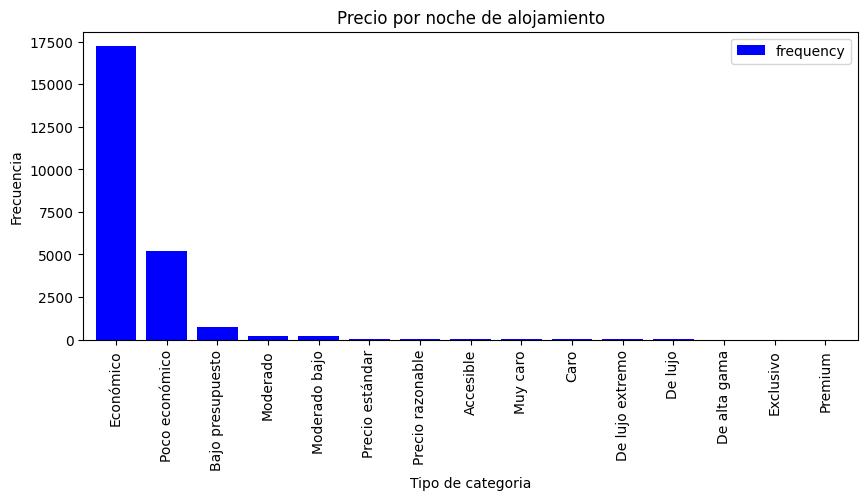

In [20]:
# Realizamos gráfico de barras del dataframe filtrado

Filtro_index.plot( kind = 'bar', width = 0.8, figsize = (10,4), color = "blue" )
plt.title('Precio por noche de alojamiento')
plt.xlabel('Tipo de categoria')
plt.ylabel('Frecuencia')